Q1:For the IRIS data set write down the meta information.


The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.



Predicted attribute: class of iris plant.

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [307]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [308]:
#loading dataset
df=pd.read_csv("/content/Iris.csv")

In [309]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [310]:
#giving a brief about the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [311]:
#to check for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [312]:
#to check for duplicate values
df[df.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


Inference: No duplicate values

In [313]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

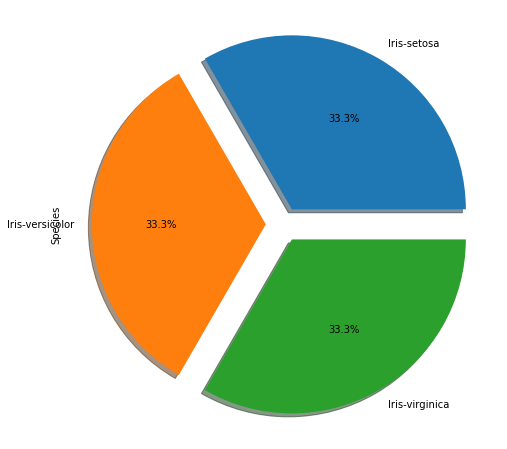

In [314]:
df['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%'
                                        ,shadow=True, figsize=(10,8))
plt.show()

Infernce: All the species are  in equal number

In [315]:
#sns.pairplot(df,hue="Species",heightm=4)

[]

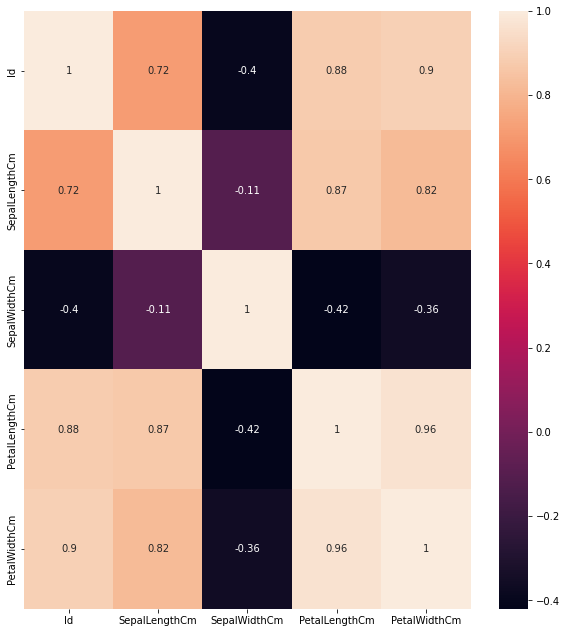

In [316]:
plt.figure(figsize=(10,11))
sns.heatmap(df.corr(),annot=True)
plt.plot()

Q2:Visualize the class label against the predictor variable using appropriate plots.

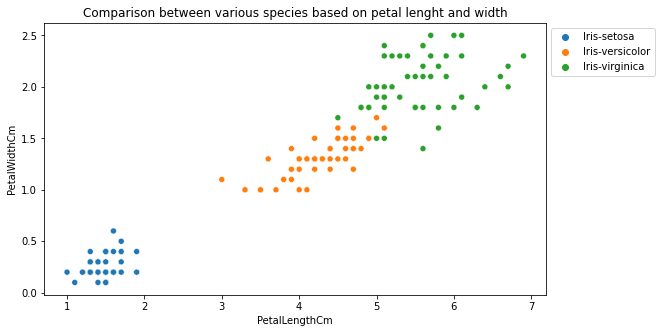

In [317]:
plt.figure(figsize=(9,5))
plt.title('Comparison between various species based on petal lenght and width')
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


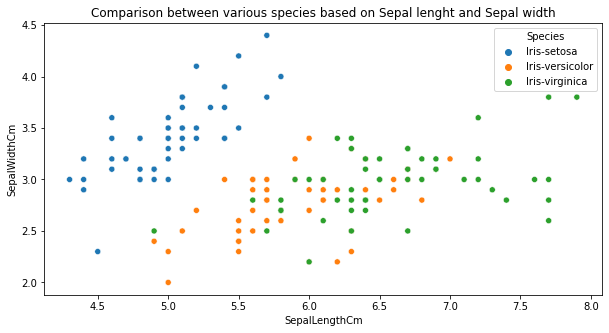

In [318]:
plt.figure(figsize=(10,5))
plt.title('Comparison between various species based on Sepal lenght and Sepal width')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
sns.scatterplot(df['SepalLengthCm'], df['SepalWidthCm'], hue = df['Species'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<function matplotlib.pyplot.show>

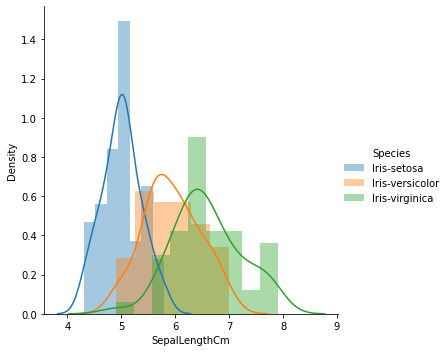

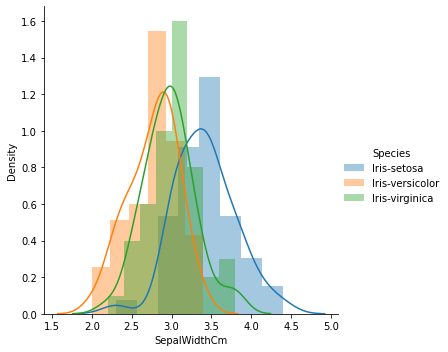

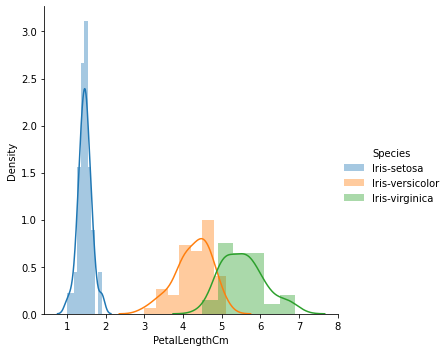

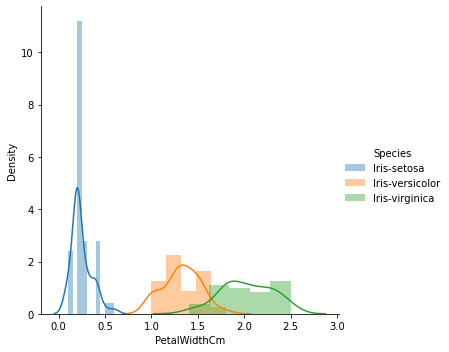

In [319]:
#visualizing individual attributes with respect to class labels
sns.FacetGrid(df, hue="Species", height=5)\
.map(sns.distplot, "SepalLengthCm")\
.add_legend()
sns.FacetGrid(df, hue="Species", height=5) \
.map(sns.distplot, "SepalWidthCm") \
.add_legend()
sns.FacetGrid(df, hue="Species", height=5) \
.map(sns.distplot, "PetalLengthCm") \
.add_legend()
sns.FacetGrid(df, hue="Species", height=5) \
.map(sns.distplot, "PetalWidthCm") \
.add_legend()
plt.show

Q3: Use the IRIS data set to build a logistic regression model (using sklearn) and predict the class label 
‘Species’. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn. 

In [320]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [321]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [322]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [323]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [324]:
#splitting of the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle= True, random_state = 0)

In [325]:
X_train= np.asarray(X_train)
y_train= np.asarray(y_train)

X_test= np.asarray(X_test)
y_test= np.asarray(y_test)

In [326]:
y_train

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [327]:
print(f'training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples')

training set size: 105 samples 
test set size: 45 samples


In [328]:
from sklearn.preprocessing import Normalizer
scaler= Normalizer().fit(X_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(X_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(X_test) # the scaler is applied to the test set

In [329]:
print('x train before Normalization')
print(X_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])

x train before Normalization
[[ 61.    5.    2.    3.5   1. ]
 [117.    6.5   3.    5.5   1.8]
 [145.    6.7   3.3   5.7   2.5]
 [120.    6.    2.2   5.    1.5]
 [109.    6.7   2.5   5.8   1.8]]

x train after Normalization
[[0.99437066 0.08150579 0.03260232 0.05705405 0.01630116]
 [0.99691911 0.0553844  0.02556203 0.04686372 0.01533722]
 [0.99775975 0.04610338 0.02270764 0.03922228 0.01720275]
 [0.99764412 0.04988221 0.01829014 0.0415685  0.01247055]
 [0.99631622 0.06124146 0.02285129 0.05301499 0.01645293]]


In [330]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Q4:Analysis and visualize the performance of the classifier using metrics, confusion matrix .

In [331]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]


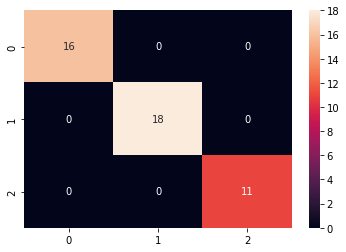

In [332]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [333]:
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_test, y_pred))

Accuracy is  1.0


In [334]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_pred))
print("Accuracy is ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy is  1.0


Q5: Use the IRIS data and KNeighborsClassifier (using sklearn) and predict the class label ‘Species’ for 
k value between 2 and 20. Divide the dataset into training and test set (80,20) using train_test_split 
method in sklearn.


In [335]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = df[feature_columns].values
y = df['Species'].values

In [336]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [337]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [338]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Q6:Identify the best k ( for k between 2 and 20) for the model built.


In [339]:
from sklearn.neighbors import KNeighborsClassifier

In [340]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [341]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [342]:
y_pred_sklearn= knn.predict(X_test)

In [343]:
y_pred_sklearn

array([2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [344]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,y_pred_sklearn)
print(cm2)

[[11  0  0]
 [ 0 11  2]
 [ 0  1  5]]


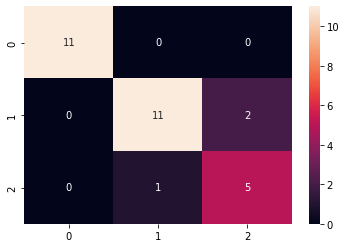

In [345]:
import seaborn as sns
sns.heatmap(cm2, annot=True)

In [346]:
print(f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_sklearn)}')

The accuracy of our implementation is 0.9


In [347]:
from sklearn.neighbors import KNeighborsClassifier

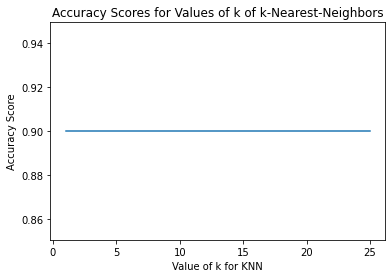

In [348]:
from sklearn import metrics
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred_sklearn))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

Q7:Comment on the classifier (Logistic Regression or KNeighborsClassifier ) that has a better 
performance for the IRIS dataset

Inference: The accuracy for the Logistic Regression model is: 1.0 whereas for the KNeighborsClassifier is 0.967 ,both are nearly equal but still logistic regression model is better than KNN model in terms of accuracy score